In [1]:
import os
import re
import glob
import random
import numpy as np
import scipy
import scipy.io as sio
import scipy.ndimage as ndimage
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.patches as patches
from matplotlib.lines import Line2D
from PIL import Image
from ipywidgets import interact, interactive, fixed, interact_manual
import braingeneers
import braingeneers.data.datasets_electrophysiology as ephys
from braingeneers.analysis.analysis import SpikeData, read_phy_files
from scipy.ndimage import gaussian_filter1d

In [2]:
sd = read_phy_files('/home/jovyan/work/Experiment/data/ephys/2023-04-02-hc328_rec/derived/kilosort2/2023_04_02_hc328_6_curated.zip')

In [3]:
sd_start = sd.subtime(0, 20000)

In [4]:
def calculate_mean_firing_rates(spike_data):
    mean_firing_rates = []
    for neuron_spikes in spike_data.train:
        num_spikes = len(neuron_spikes)
        time_duration = spike_data.length / 1000  # Assuming spike times are in milliseconds
        firing_rate = num_spikes / time_duration
        mean_firing_rates.append(firing_rate)

    return np.array(mean_firing_rates)

In [5]:
firing_rates = calculate_mean_firing_rates(sd_start)

In [6]:
def firing_plotter(sd):
    neuron_x = []
    neuron_y = []
    neuron_amp = []

    for neuron in sd.neuron_data[0].values():
        neuron_x.append(neuron['position'][0])
        neuron_y.append(neuron['position'][1])

#     scaled_sizes = (firing_rates - np.min(firing_rates)) / (np.max(firing_rates) - np.min(firing_rates))
#     scaled_sizes = scaled_sizes * 1000 + 20  # Adjust the scaling factor as desired

    plt.figure(figsize=(8, 6))
    # Increase the 's' parameter to make the scatter points larger
    # Adjust the 'alpha' parameter to make the scatter points less opaque
    plt.scatter(neuron_x, neuron_y, s=firing_rates*50 + firing_rates**2.5, alpha=0.3,c ='r')

    plt.show()

In [8]:
firing_rates

array([37.45,  3.  ,  2.35,  2.3 ,  0.55,  0.6 ,  4.75,  4.2 ,  3.15,
        2.3 ,  3.9 ,  0.25,  0.25,  0.35,  1.3 ,  2.7 ,  1.  ,  1.3 ,
        2.95, 40.25,  0.25,  0.45,  2.  ,  0.8 ,  0.2 ,  2.9 ,  0.55,
        2.7 ,  0.25,  1.1 ,  0.25,  1.1 ,  0.4 ,  0.55,  4.55,  0.8 ,
        3.25,  0.3 ,  3.25,  0.25,  0.2 ,  4.3 ,  2.1 ,  4.9 ,  0.35,
        0.2 ,  4.15,  2.7 ,  1.2 ,  3.05,  0.15,  0.6 ,  3.15,  0.75,
        0.7 ,  0.3 ,  0.15,  2.85,  4.85])

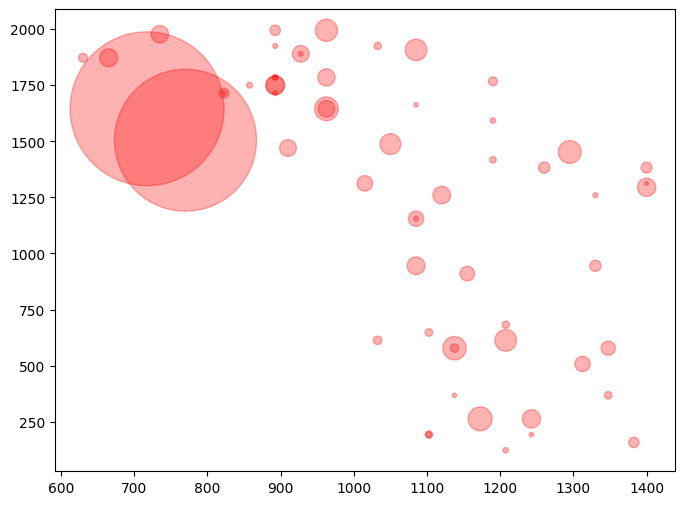

In [7]:
firing_plotter(sd_start)